In [207]:
import networkx
from community import community_louvain
from networkx.algorithms import community
from networkx.algorithms.community.quality import modularity
import numpy as np
import matplotlib.pyplot as plt

In [175]:
plt.rcParams["font.family"] = "Monaco"
cm = plt.cm.BrBG

DATA = 'data/soc-dolphins.mtx'
Graph = networkx.read_weighted_edgelist(DATA, comments='%', nodetype=int)

In [176]:
number_of_nodes = Graph.number_of_nodes()
number_of_edges = Graph.number_of_edges()
density = round(networkx.density(Graph), 4)

min_degree = min(dict(Graph.degree()).values())
max_degree = max(dict(Graph.degree()).values())
avg_degree = round(sum(dict(Graph.degree()).values()) / number_of_nodes, 4)

number_of_triangles = sum(networkx.triangles(Graph).values())
avg_number_of_triangles = round(
    number_of_triangles / Graph.number_of_nodes(), 4)

clustering_coefficient = round(networkx.average_clustering(Graph), 4)
diameter = networkx.diameter(Graph)

print("-----------------------------------")
print("Some statistics about the dataset")
print("-----------------------------------")
print("Number of nodes:", number_of_nodes)
print("Number of edges:", number_of_edges)
print("Density:", density)
print("-----------------------------------")
print("Minimum degree:", min_degree)
print("Maximum degree:", max_degree)
print("Average degree:", avg_degree)
print("-----------------------------------")
print("Number of triangles:", number_of_triangles)
print("Average number of triangles:", avg_number_of_triangles)
print("-----------------------------------")
print("Clustering coefficient:", clustering_coefficient)
print("Diameter:", diameter)
print("-----------------------------------")

-----------------------------------
Some statistics about the dataset
-----------------------------------
Number of nodes: 62
Number of edges: 159
Density: 0.0841
-----------------------------------
Minimum degree: 1
Maximum degree: 12
Average degree: 5.129
-----------------------------------
Number of triangles: 285
Average number of triangles: 4.5968
-----------------------------------
Clustering coefficient: 0.259
Diameter: 8
-----------------------------------


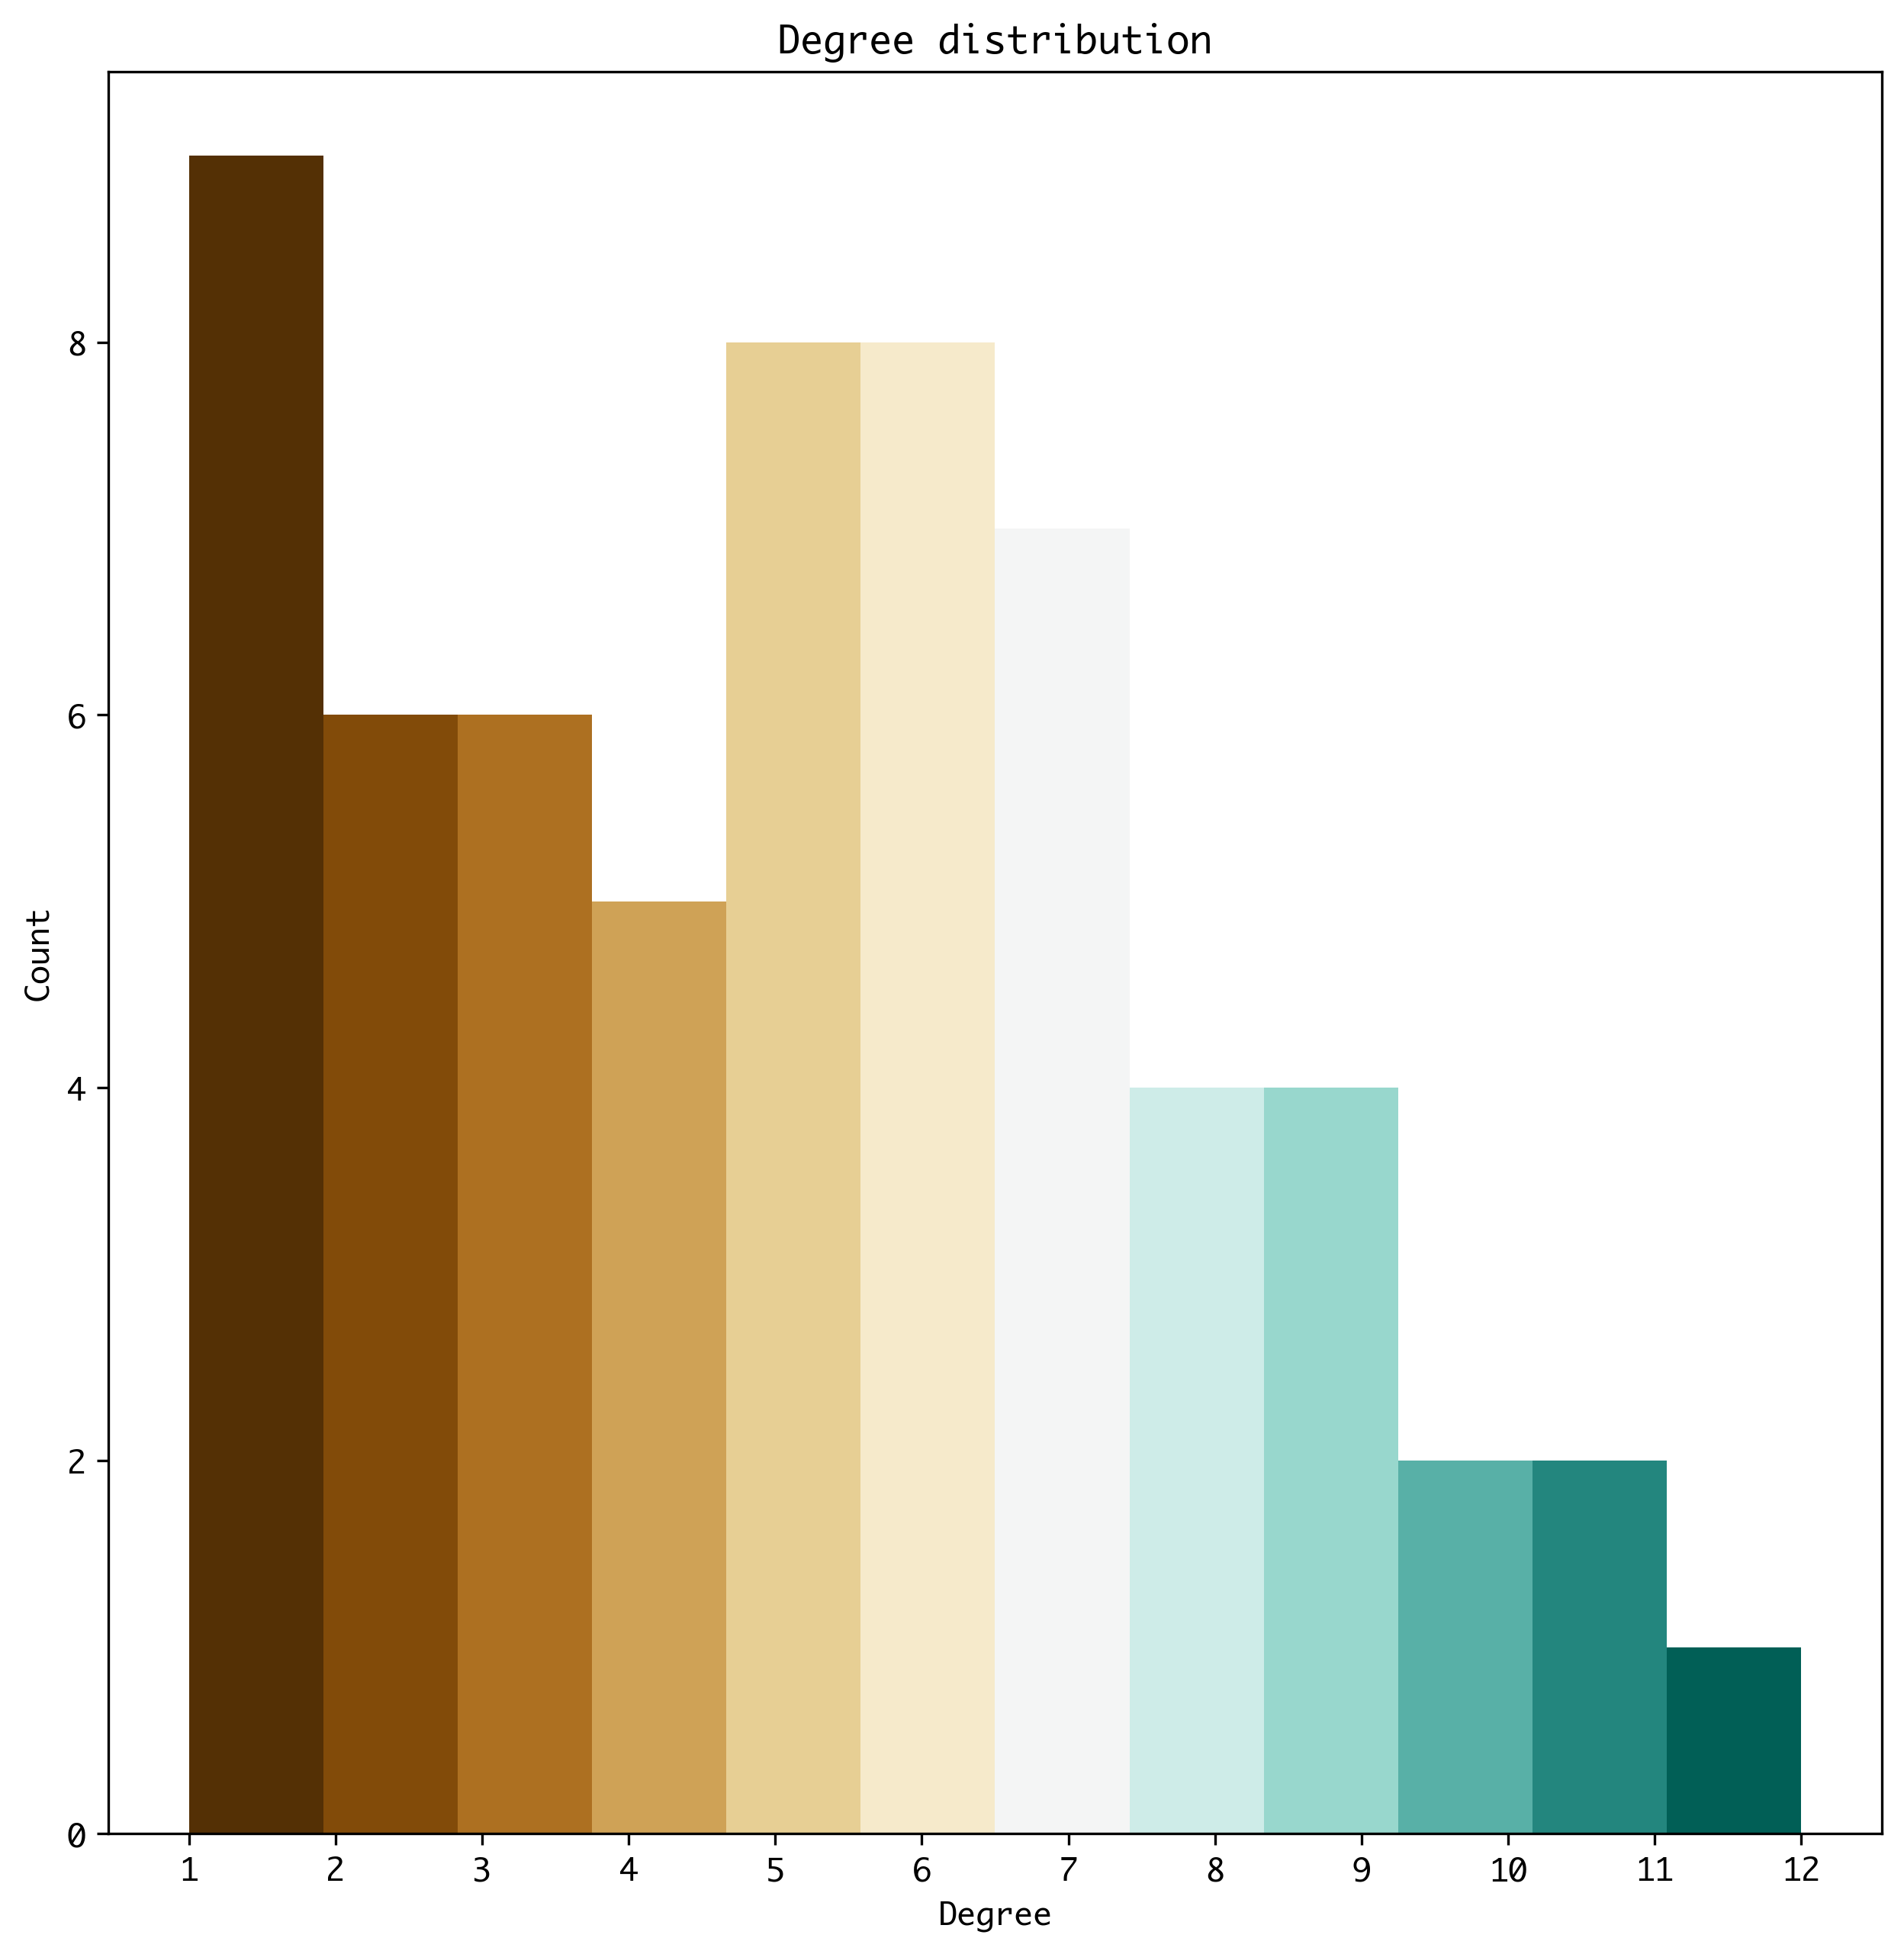

In [177]:
degrees = dict(Graph.degree())

plt.figure(figsize=(10, 10), dpi = 300)
_, _, patches = plt.hist(degrees.values(), 12)
for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i / 12))
plt.xlabel('Degree')
plt.xticks(np.arange(min_degree, max_degree + 1, 1))
plt.ylabel('Count')
plt.title('Degree distribution')
plt.savefig('result/degree_distribution.png')
plt.show()

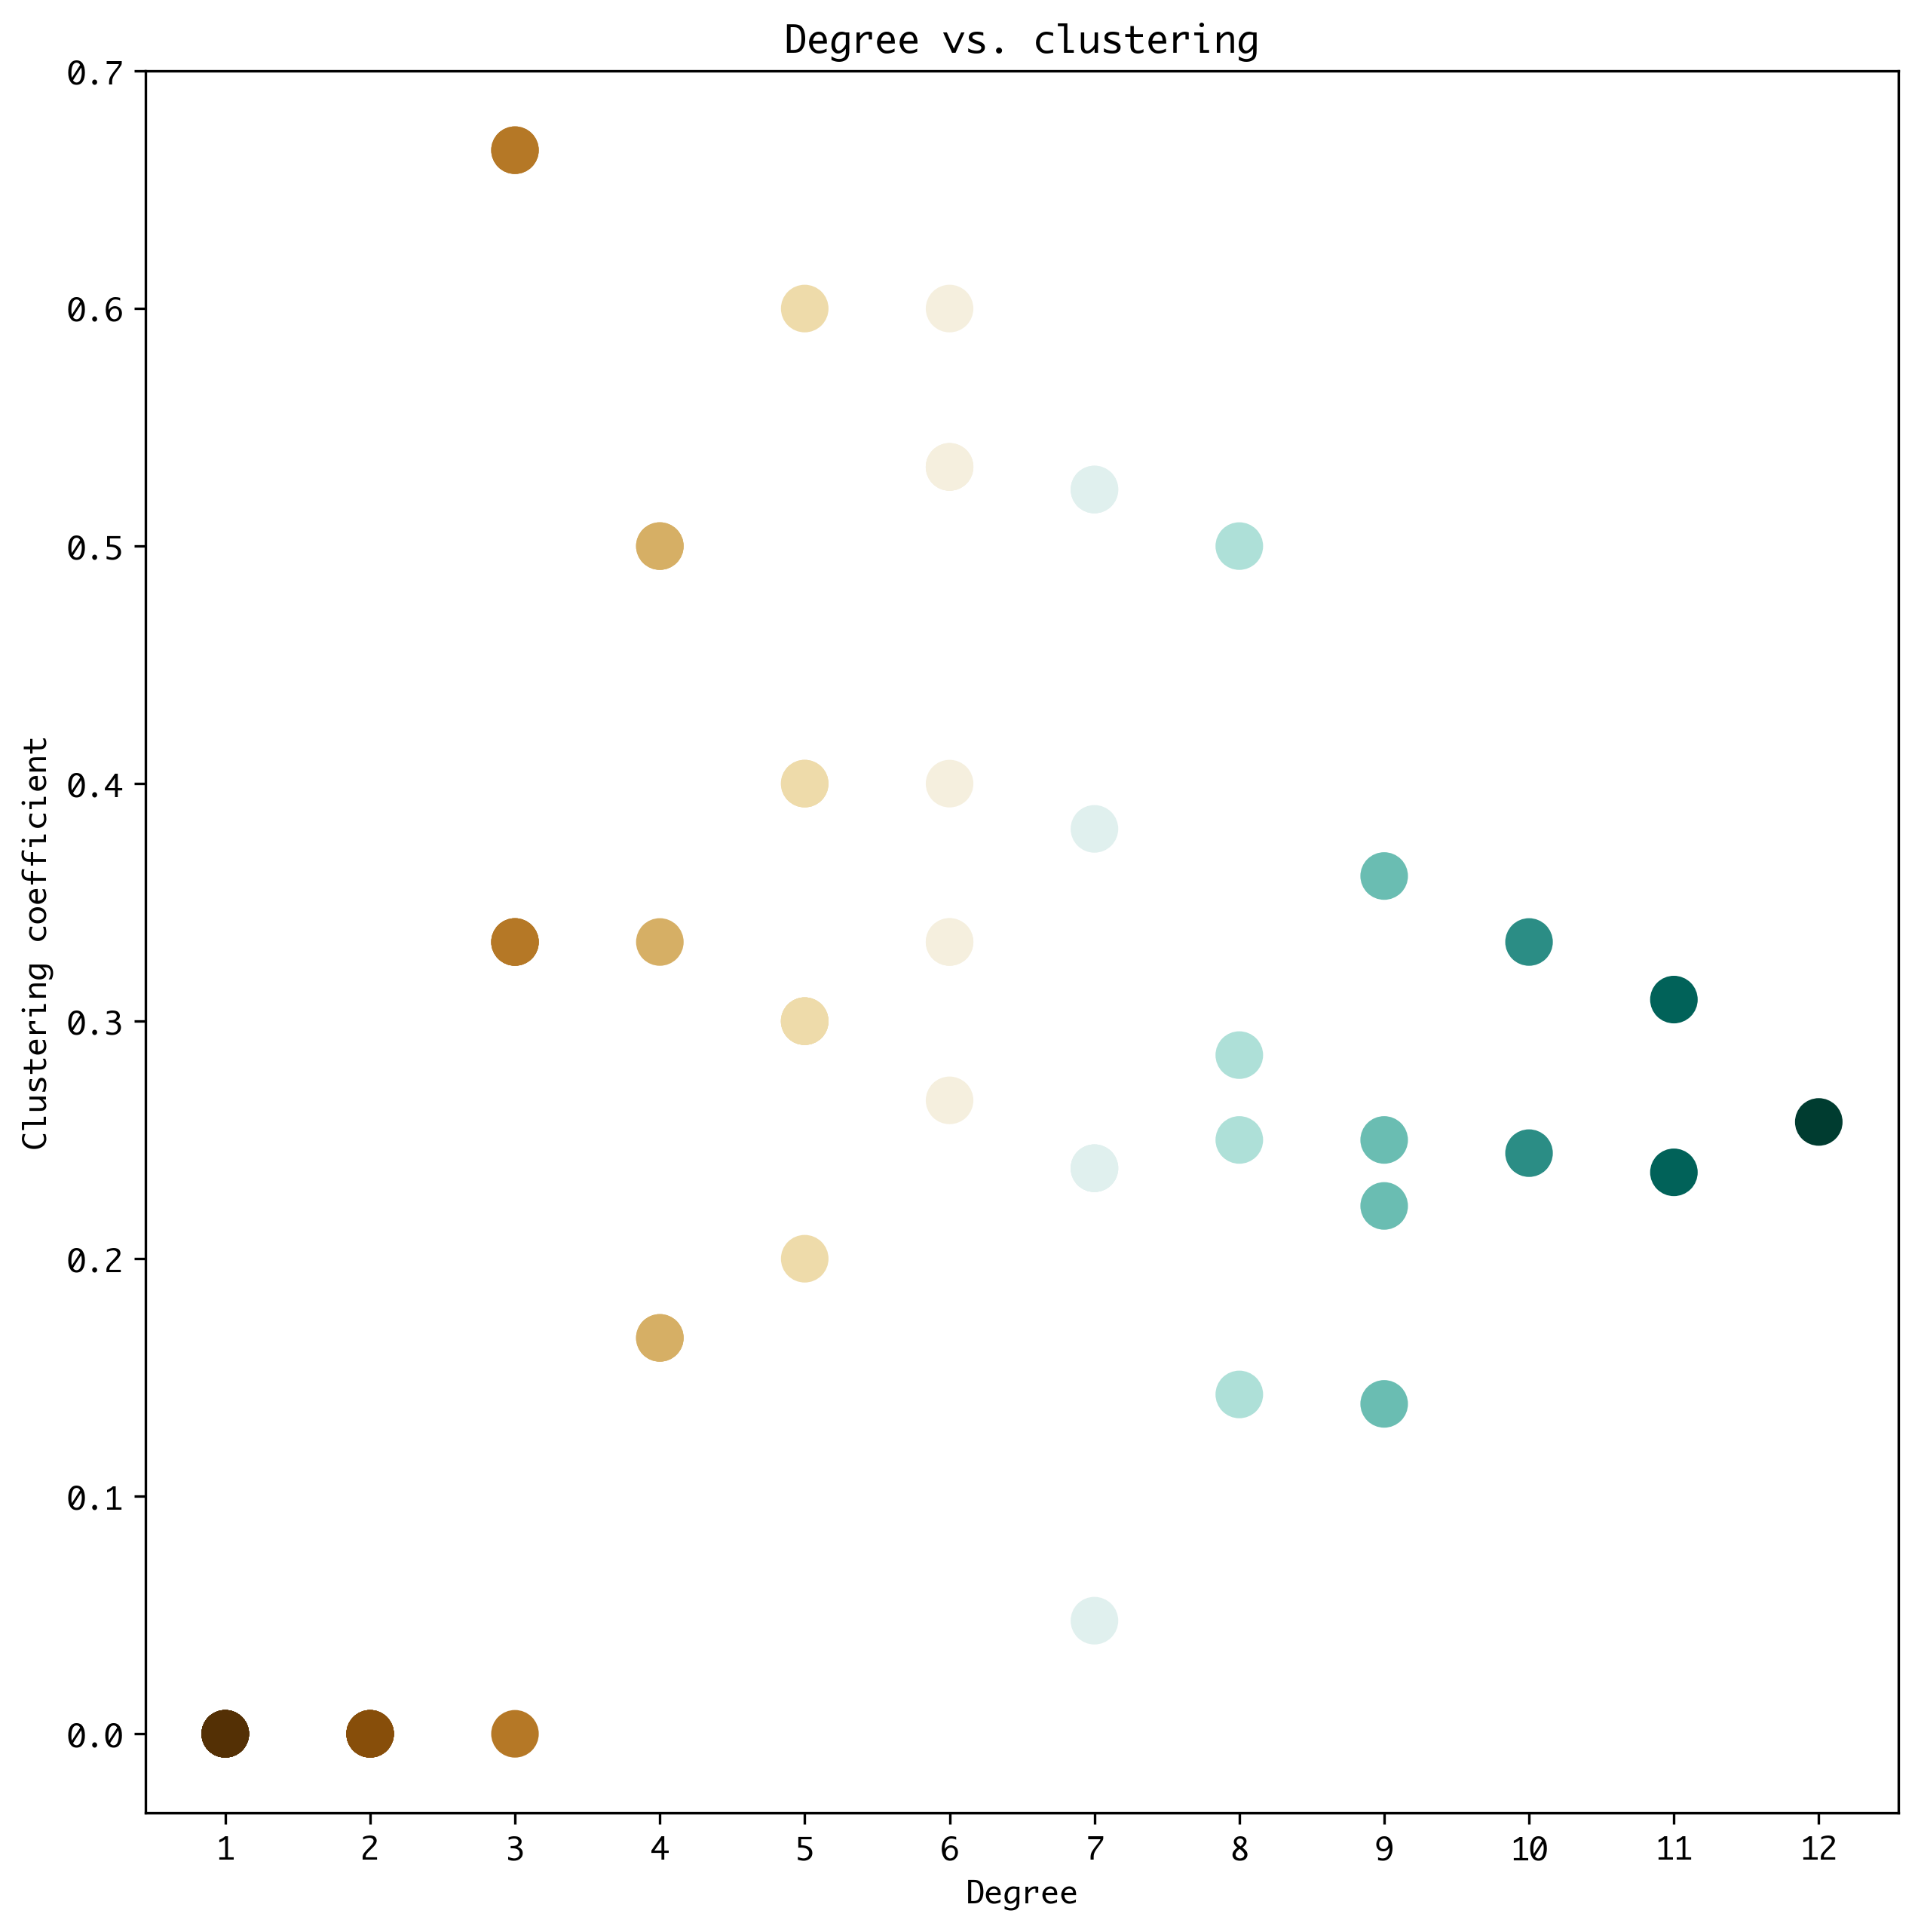

In [179]:
degrees = dict(Graph.degree())
clustering = networkx.clustering(Graph)

plt.figure(figsize=(10, 10), dpi = 300)
plt.scatter(x=list(degrees.values()), y=list(clustering.values()), s=200, c=list(degrees.values()), cmap=cm)
plt.xticks(np.arange(min_degree, max_degree + 1, 1))
plt.xlabel("Degree")
plt.ylabel("Clustering coefficient")
plt.title("Degree vs. clustering")
plt.savefig('result/degree_vs_clustering.png')
plt.show()


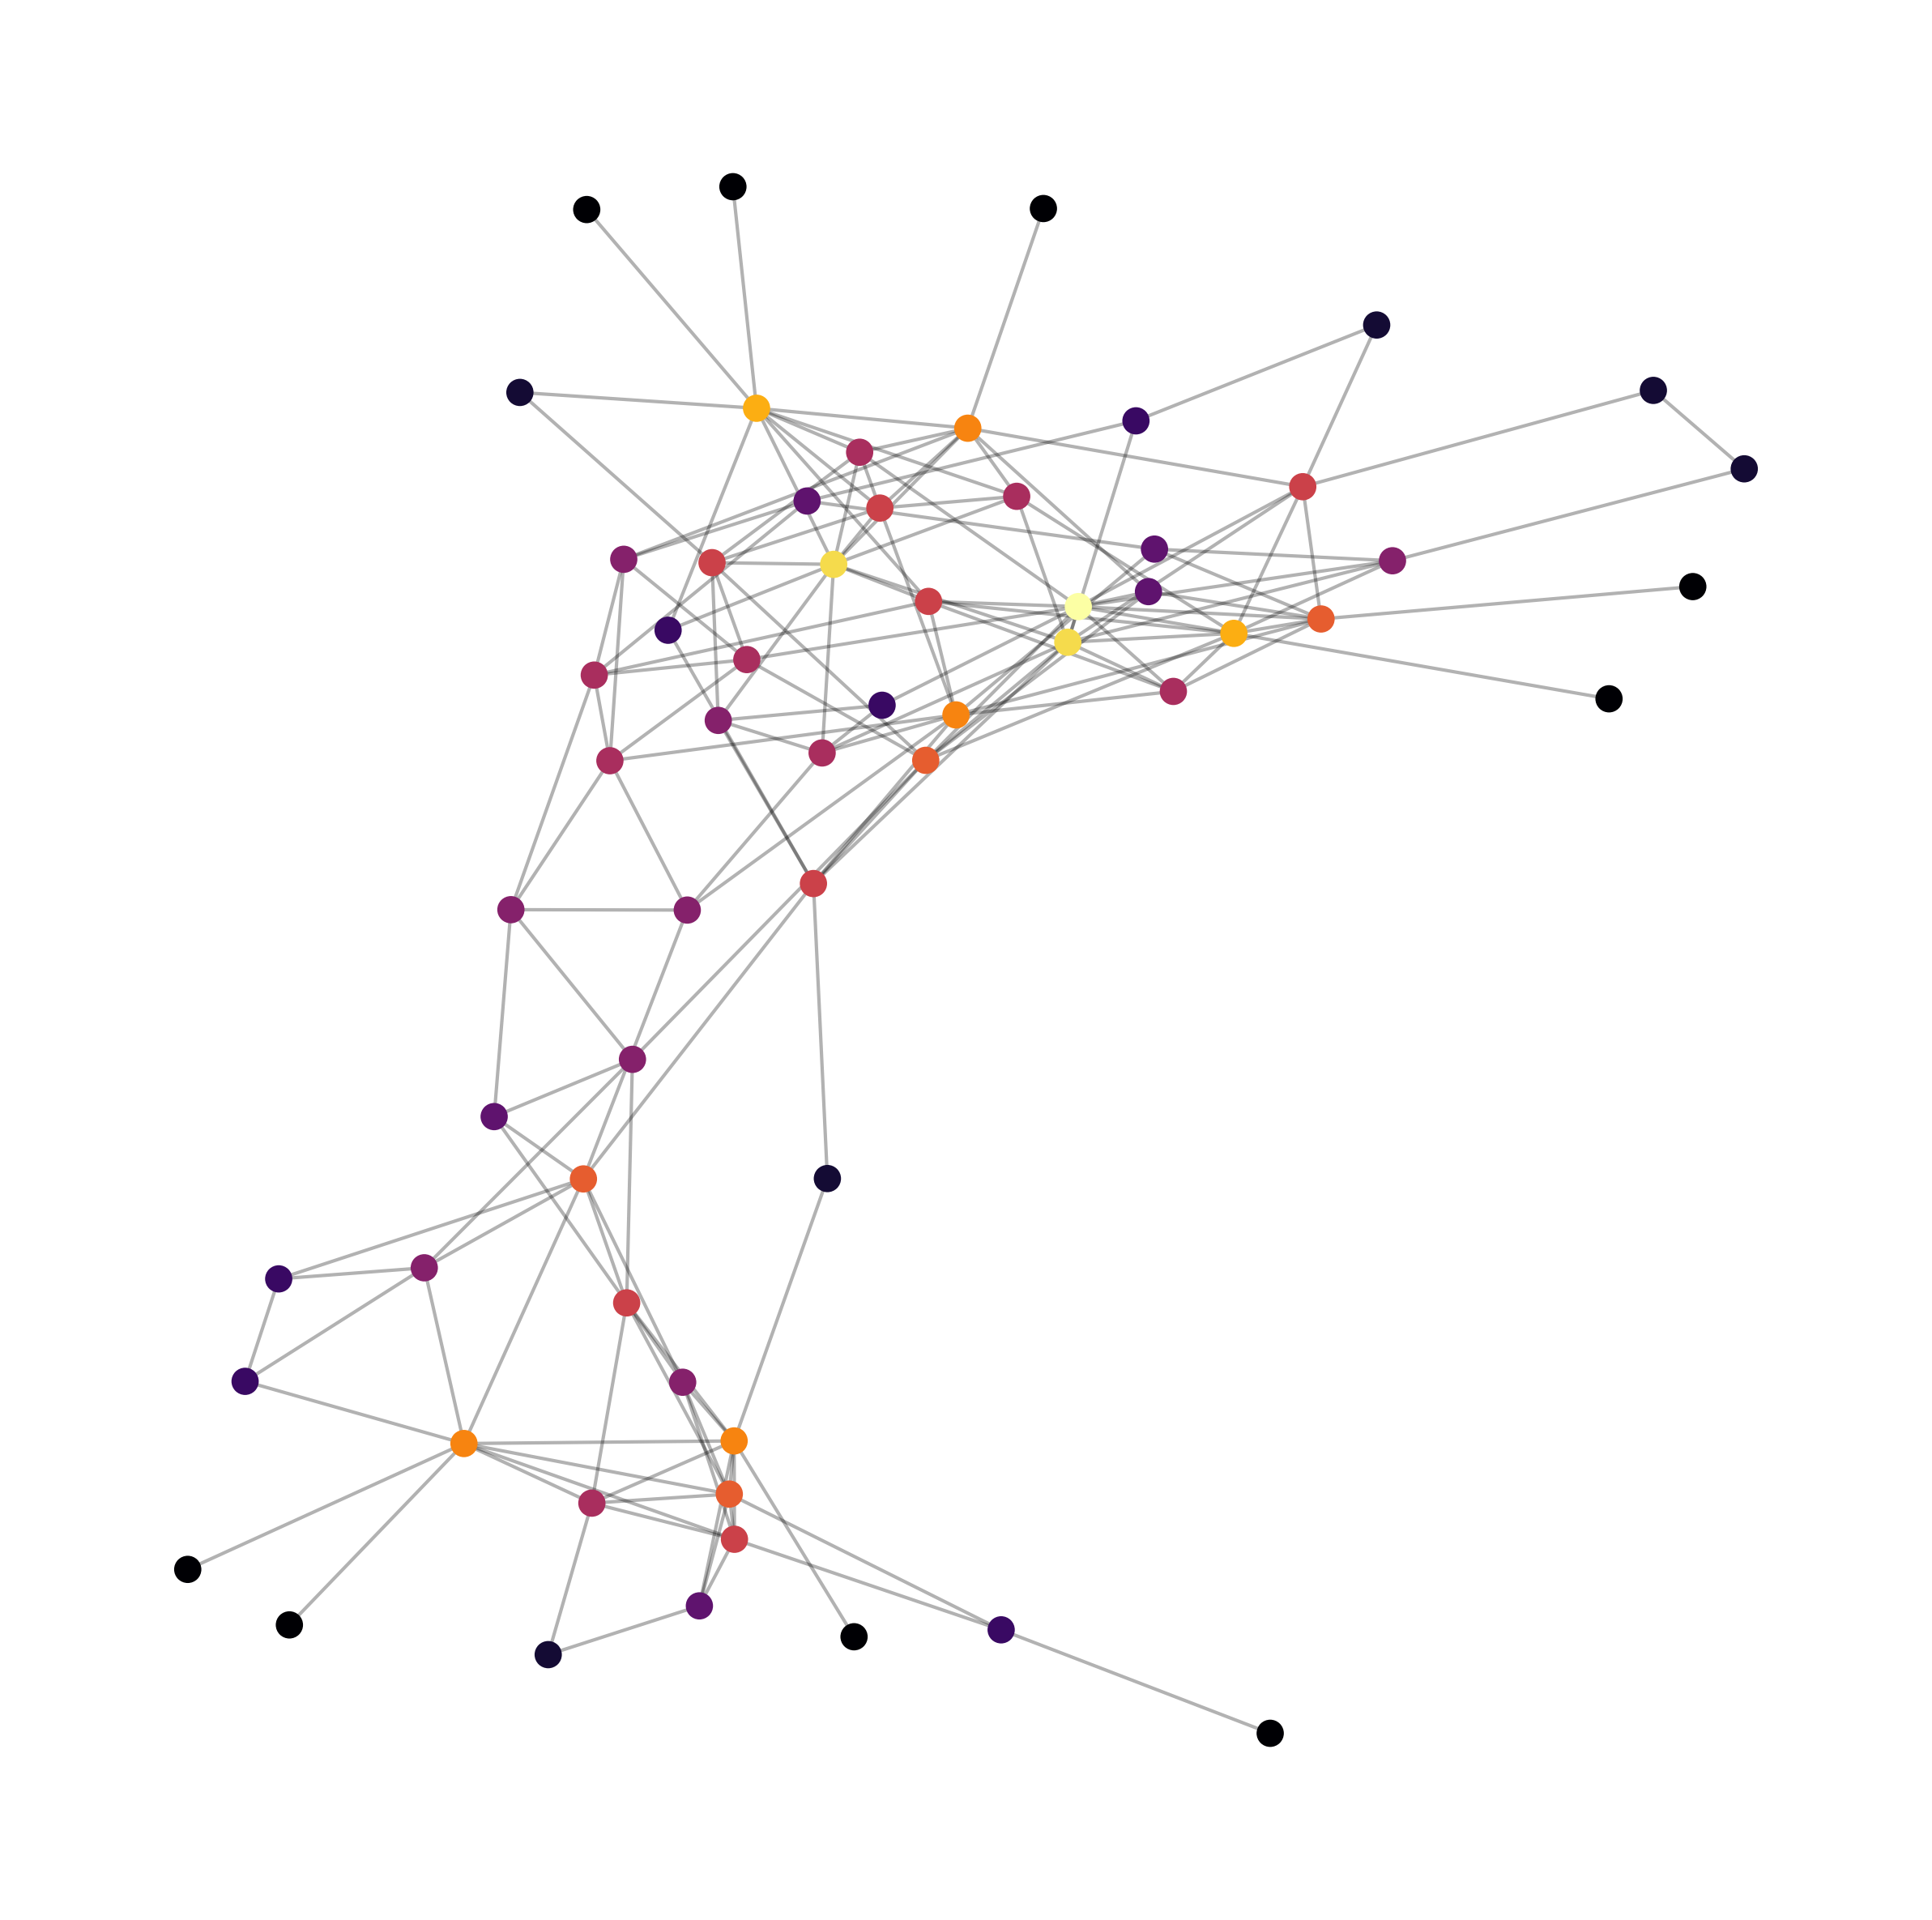

In [188]:
plt.figure(figsize=(10, 10), dpi = 300)
pos = networkx.spring_layout(Graph)
networkx.draw_networkx_nodes(Graph, pos, node_size=50, node_color=list(degrees.values()), cmap='inferno')
networkx.draw_networkx_edges(Graph, pos, width=1.0, alpha=0.3)
plt.axis('off')
plt.savefig('result/graph.png')
plt.show()

/var/folders/ff/r4b5612d6pj693ck9ldzc96w0000gn/T/ipykernel_20035/3799395671.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(A, method='ward')


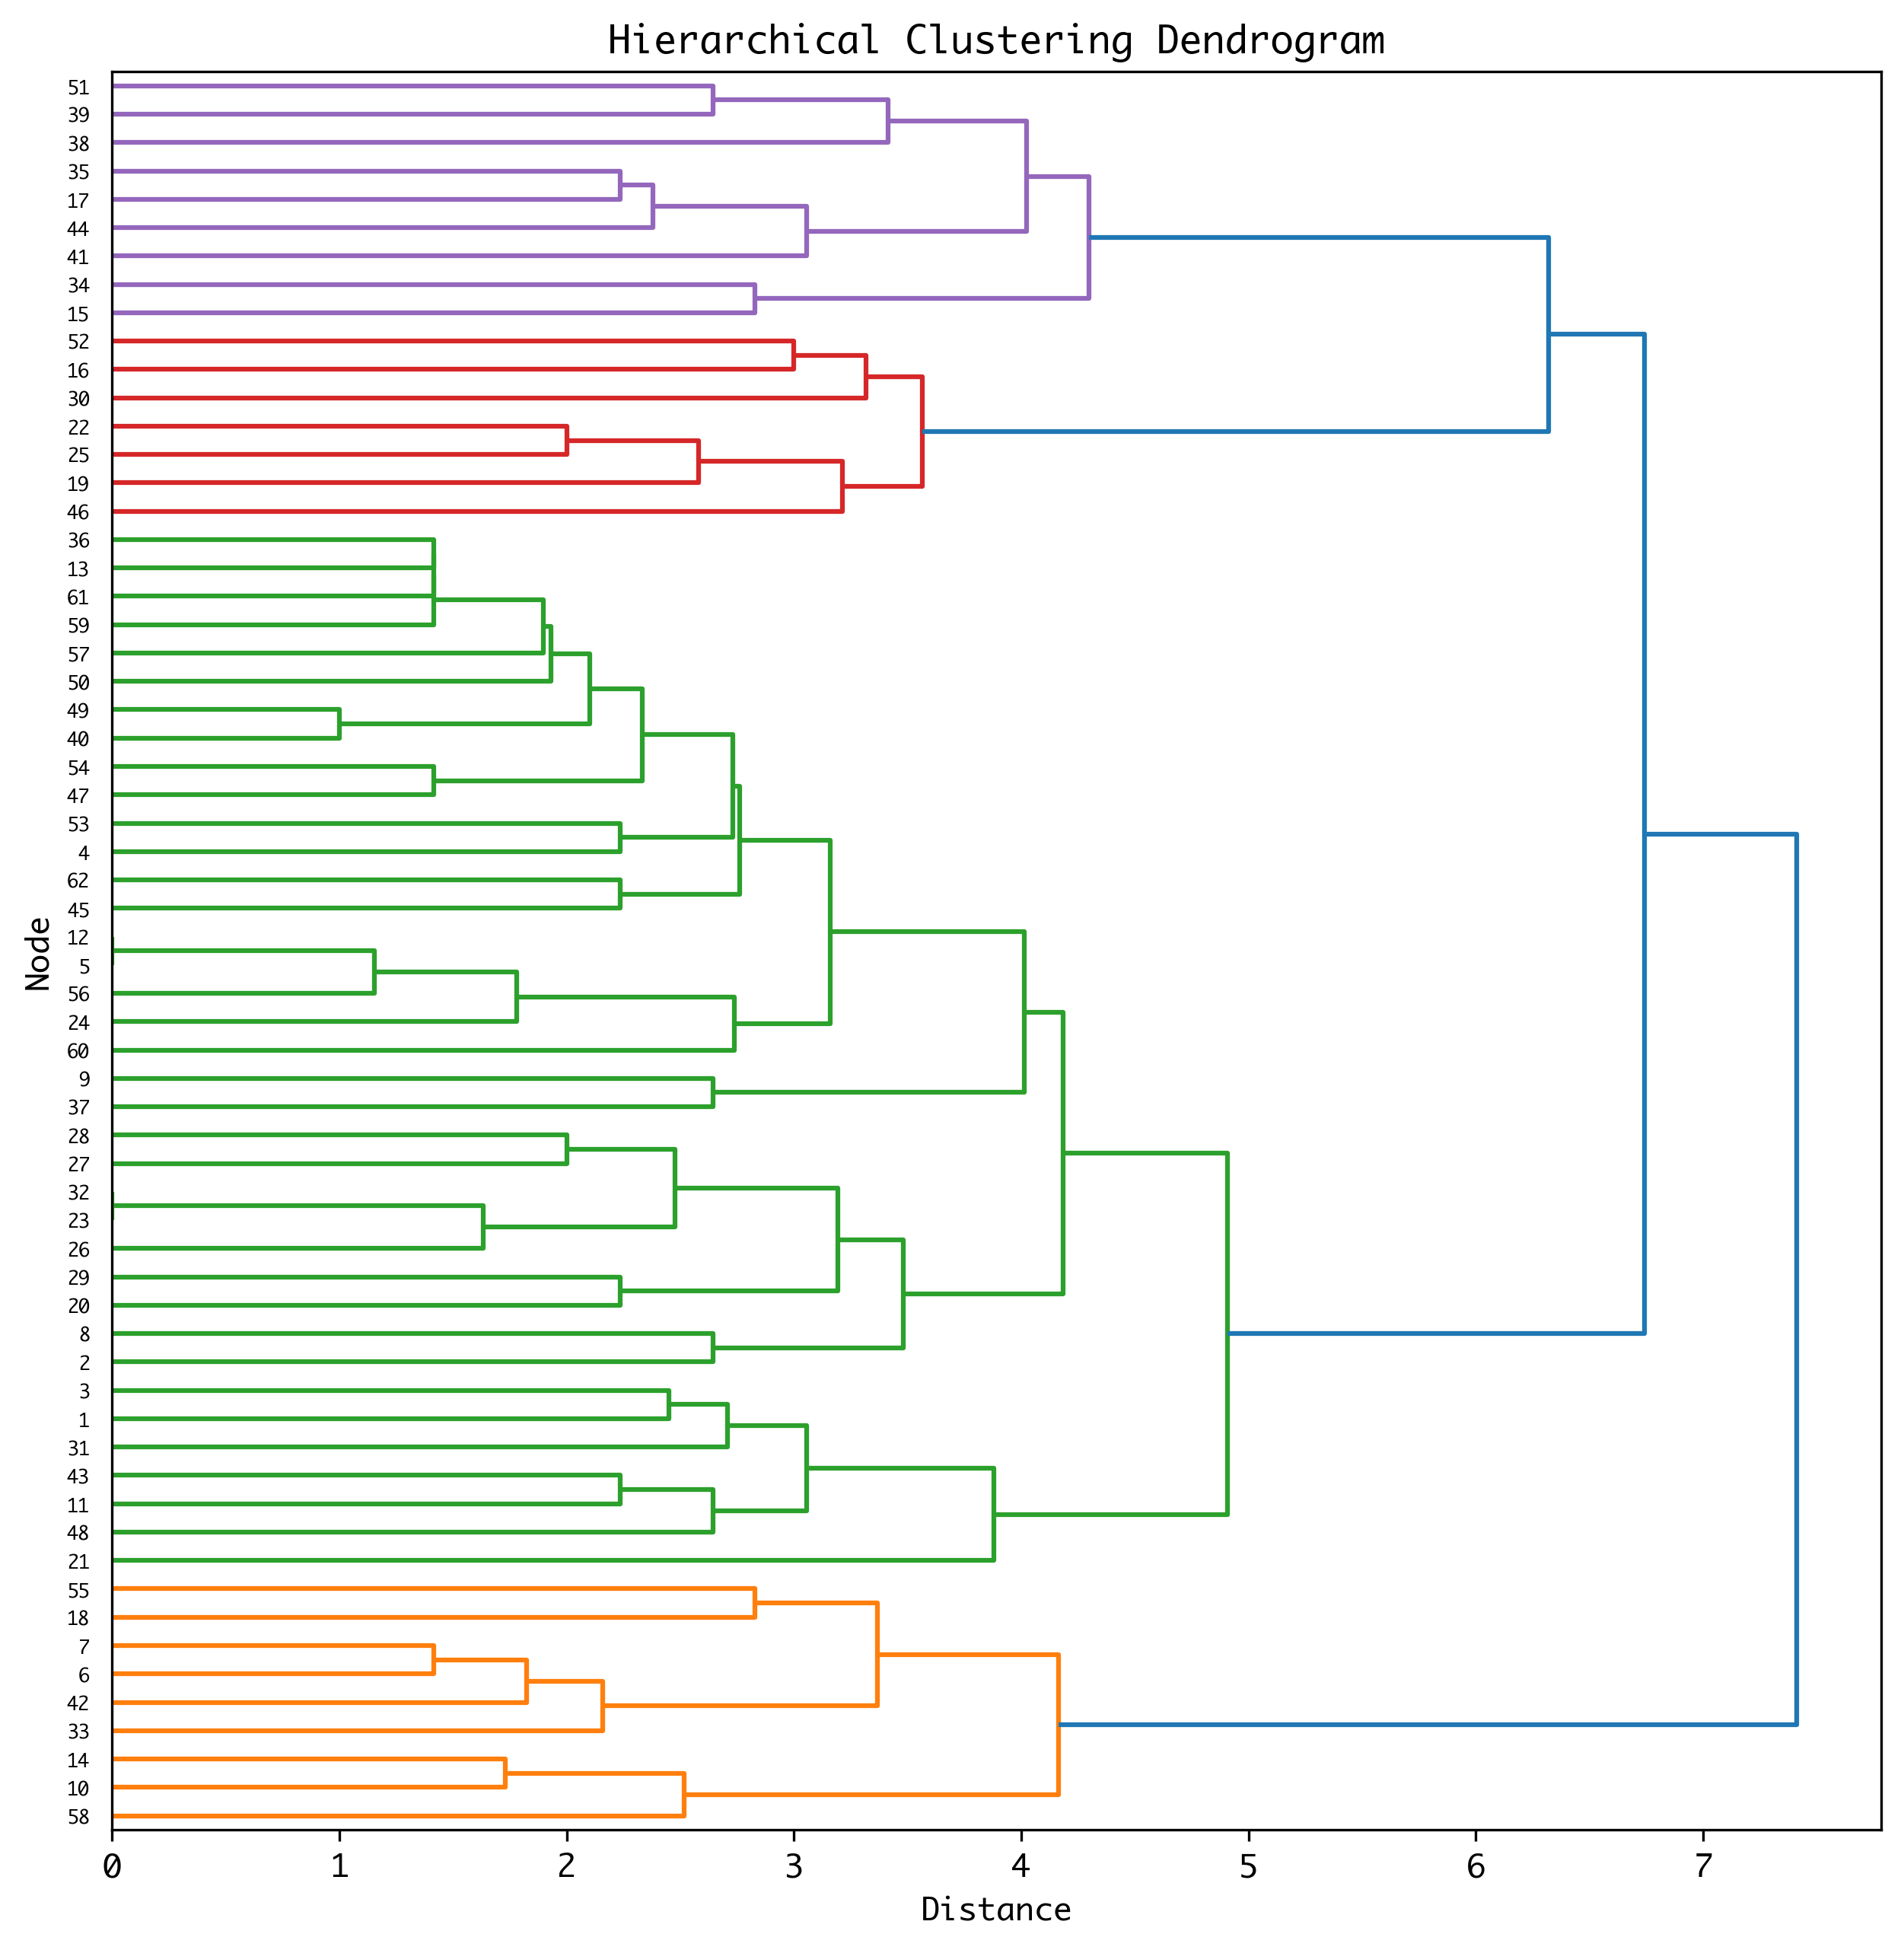

In [219]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Convert the graph to a numpy array
A = networkx.to_numpy_array(Graph)

# Compute the linkage matrix
Z = linkage(A, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 10), dpi = 300)
dendrogram(Z, labels=list(Graph.nodes()), orientation='right')
plt.xlabel('Distance')
plt.ylabel('Node')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


Modularity: 0.3787


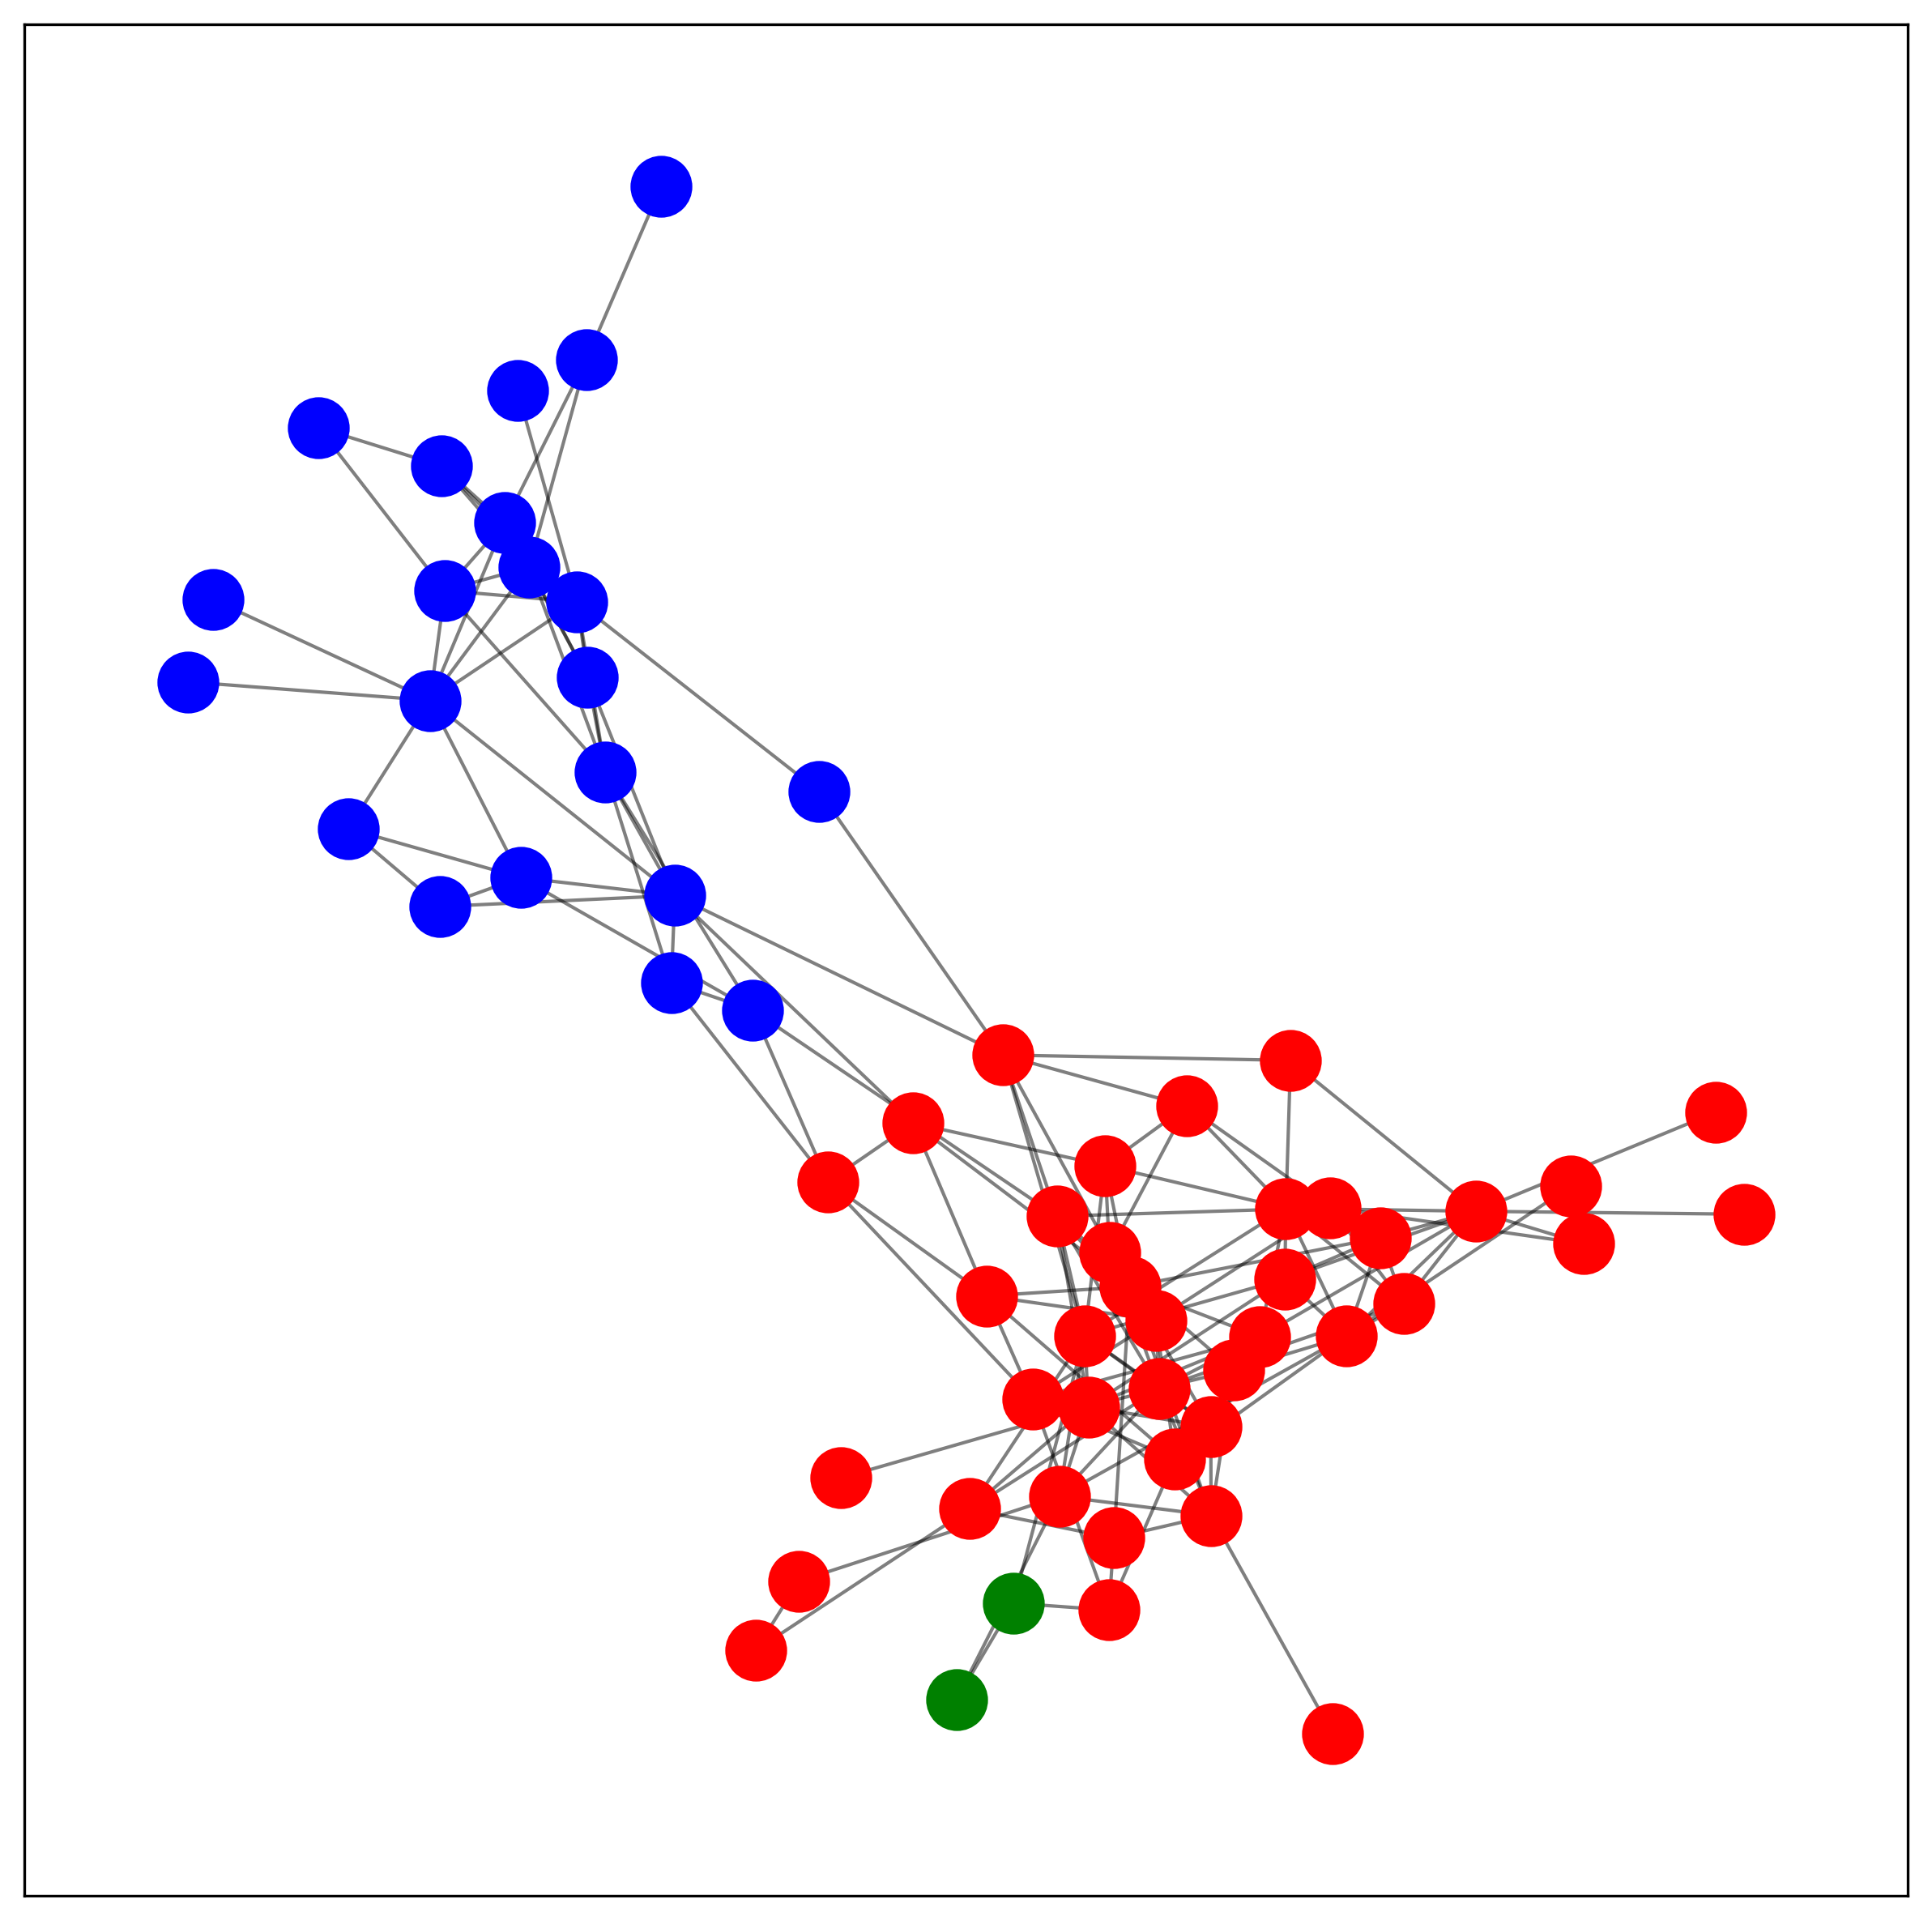

In [213]:
comp = community.girvan_newman(Graph)
communities = tuple(sorted(c) for c in next(comp))
mod = modularity(Graph, communities)
print(f"Modularity: {round(mod, 4)}")
top_level_comm = next(comp)
pos = networkx.spring_layout(Graph)
colors = ['r', 'b', 'g', 'y', 'm', 'c', 'k']

plt.figure(figsize=(10, 10), dpi = 300)
for i, communities in enumerate(top_level_comm):
    networkx.draw_networkx_nodes(Graph, pos, nodelist=communities, node_color=colors[i%7])
networkx.draw_networkx_edges(Graph, pos, alpha=0.5)
plt.title("Girvan Newman Algorithm for Community Detection")
plt.show()

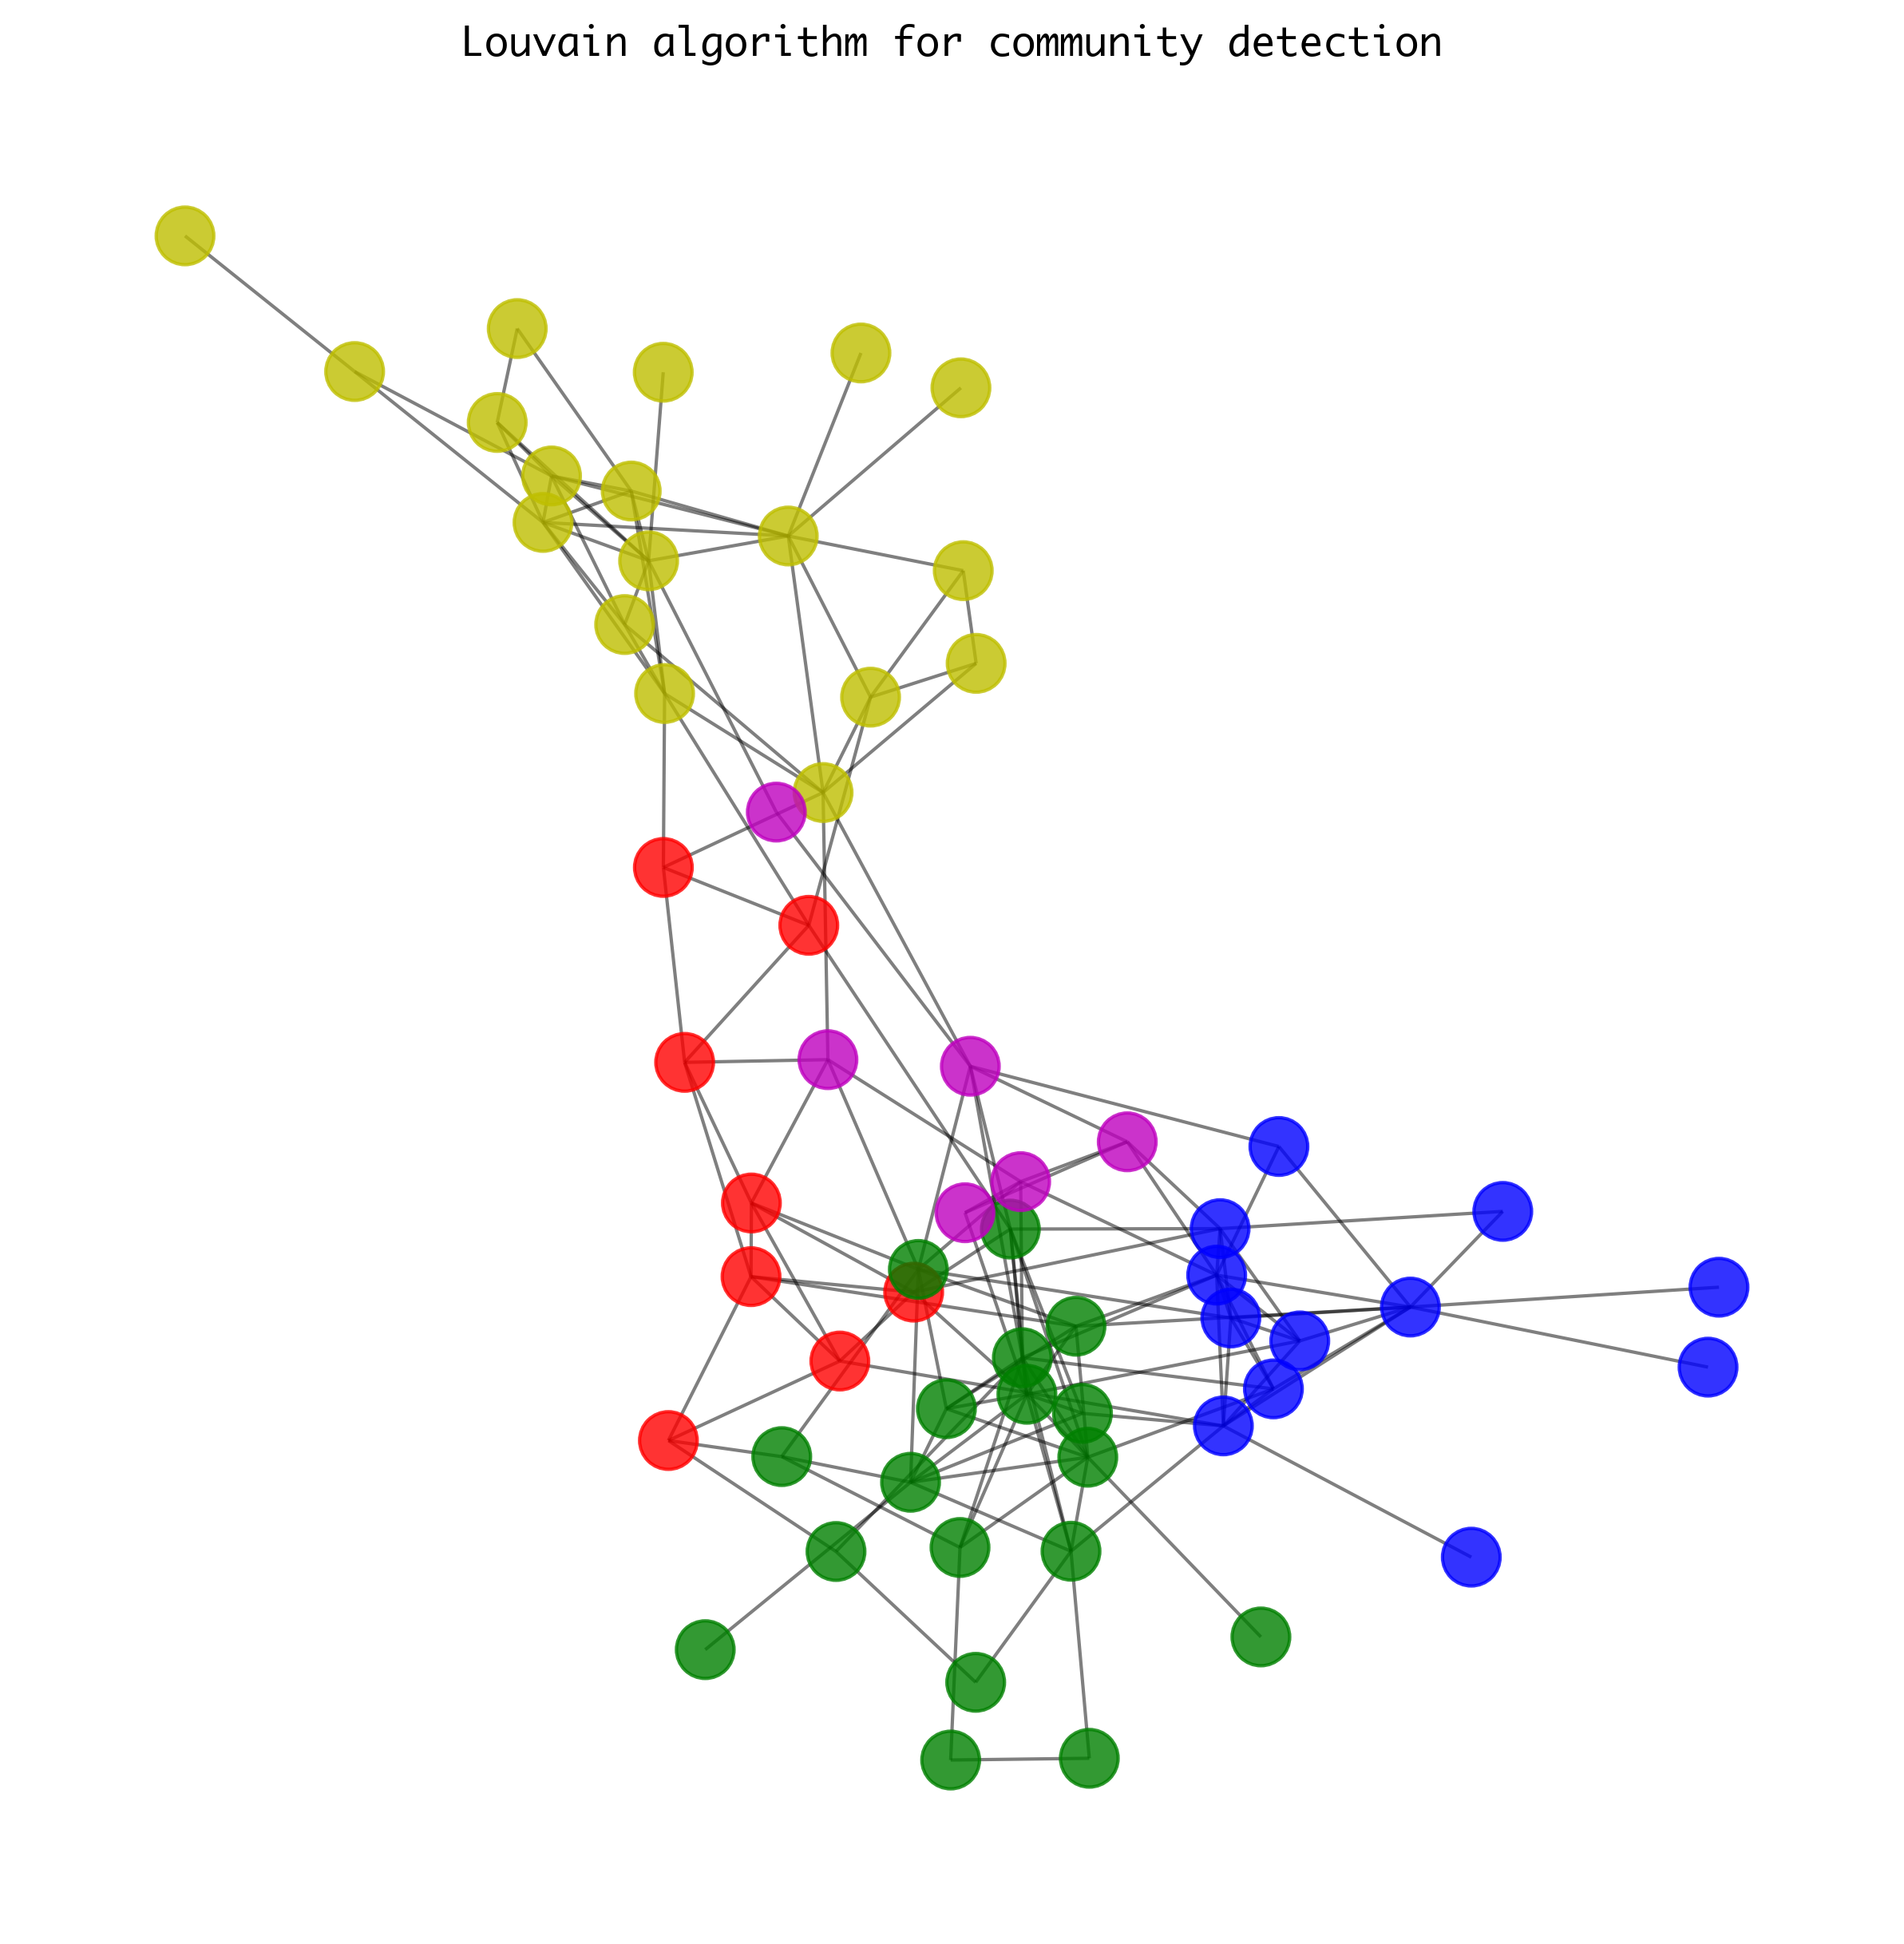

In [214]:
# Run the Louvain algorithm to detect communities
partition = community_louvain.best_partition(Graph)

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm', 5: 'c'}

node_colors = [colors[partition[n]] for n in Graph.nodes()]

plt.figure(figsize=(10, 10), dpi = 300)
pos = networkx.spring_layout(Graph)
networkx.draw_networkx_nodes(Graph, pos, node_color=node_colors, alpha=0.8)
networkx.draw_networkx_edges(Graph, pos, alpha=0.5)

plt.title("Louvain algorithm for community detection")
plt.axis('off')
plt.show()
